
# Trabajo Practico Final - Analisis de Datos CEIA 2024
## Spotify
## Integrantes
### Belen, Santiago
### Hagata, Juan Pablo
### Juárez Yélamos, Fausto
### Silva, Hernan Matias





## Atributos del dataset
| Atributo         | Descripción                                          |
|------------------|------------------------------------------------------|
| `Acousticness` / `Acústica`    | Escala de 0.0 a 1.0 mide cuán acústica es una pista; 1.0 indica totalmente acústica.
| `Danceability` o `Bailabilidad`     | Escala de 0.0 a 1.0 evalúa qué tan bailable es una pista, considerando tempo, ritmo y regularidad. 0.0 es lo menos bailable; 1.0 es lo más bailable.    |
| `Duration` o `Duración`         | Duración de la pista en milisegundos.          |
| `Energy` o `Energía`           | Escala de 0.0 a 1.0 mide la energía de una pista, basada en factores como volumen, timbre y dinámica. 0.0 es menos enérgico; 1.0 es muy enérgico.      |
| `Instrumentalness` o `Instrumentalidad` | Escala de 0.0 a 1.0 predice si una pista carece de voces; valores como "ooh" y "aah" cuentan como instrumentales. Un valor cercano a 1.0 sugiere alta probabilidad de ausencia de voces. Cuanto más cerca esté el valor de instrumentalidad de 1,0, mayor será la probabilidad de que la pista no contenga contenido vocal. |
| `Key` o `Tonalidad`              | Tono general estimado de la pista. Los números enteros se asignan a tonos utilizando la notación estándar de clase de tono. P.ej. 0 = C, 1 = C♯/D♭, 2 = D, y así sucesivamente. Si no se detectó ninguna clave, el valor es -1.   |
| `Liveness` o `Público`         | Escala de 0.0 a 1.0 mide la probabilidad de que una pista se haya interpretado en vivo; valores superiores a 0.8 indican alta probabilidad de una actuación en vivo.  |
| `Loudness`o `Volumen`         | Escala de -60 a 0 dB mide el volumen general de una pista, permitiendo comparar el volumen relativo entre pistas. El volumen se relaciona con la fuerza física del sonido.           |
| `Mode` o `Modo`            | La modalidad de una pista se indica con un 1 para mayor y un 0 para menor, reflejando el tipo de escala de su contenido melódico. |
| `Speechiness` o `Nivel de habla`     | Escala de 0.0 a 1.0 mide la presencia de palabras habladas en una pista. Valores sobre 0.66 indican grabaciones principalmente habladas, como audiolibros o programas de entrevistas. Valores entre 0.33 y 0.66 pueden incluir tanto música como voz, como en la música rap. Valores bajo 0.33 generalmente representan música sin palabras habladas   |
| `Tempo`        | Pulsaciones por minuto (BPM), reflejando la velocidad o ritmo de la música, basado en la duración promedio del tiempo.         |
| `Time_signature` o `Compás`  | Indica cuántos tiempos hay en cada compás, según las convenciones de notación musical.                      |
| `Valence` o `Valencia`          |Escala de 0.0 a 1.0 mide la positividad que transmite una pista. Valores altos indican sonidos más positivos (felices, alegres), mientras que valores bajos suenan más negativos (tristes, enojados).|
| `Label` o `Etiqueta`           | Etiqueta o clasificación de la pista.                |
  

#  Datos de distintas canciones en Spotify.

Preguntas interesantes para considerar aquí: El objetivo aquí es poder estimar si un tema nuevo será del gusto de la persona que tiene esta playlist activa. En este caso la variable label corresponde a nuestra variable de salida a analizar.

# Importamos librerias necesarias

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# Visualizacion
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from six import StringIO
from IPython.display import Image, display
import pydotplus
import sklearn

from sklearn import tree

# machine learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Paso 1 (General)

## Adquirir datos
La librería Pandas nos ayuda a trabajar con nuestros conjuntos de datos. Comenzamos cargando los datos de entrenamiento en Pandas DataFrames.

In [2]:
file_path = 'https://drive.google.com/uc?id=1c1l3OMUFjQWcydV0srKe95LLEfkBMKia'
playlist_df = pd.read_csv(file_path)

## Obsevamos las columnas


In [3]:
print(playlist_df.columns.values)

['acousticness' 'danceability' 'duration' 'energy' 'instrumentalness'
 'key' 'liveness' 'loudness' 'mode' 'speechiness' 'tempo' 'time_signature'
 'valence' 'label']


### Transformamos los valores

In [4]:
# Traduccion de features
traducciones = {
    'acousticness': 'Acústica',
    'danceability': 'Bailabilidad',
    'duration': 'Duración',
    'energy': 'Energía',
    'instrumentalness': 'Instrumentalidad',
    'key': 'Tonalidad',
    'liveness': 'Público',
    'loudness': 'Volumen',
    'mode': 'Modo',
    'speechiness': 'Nivel de habla',
    'tempo': 'Tempo',
    'time_signature': 'Compás',
    'valence': 'Valencia',
    'label': 'Etiqueta'
}

playlist_df.rename(columns=traducciones, inplace=True)

print(playlist_df.columns)

Index(['Acústica', 'Bailabilidad', 'Duración', 'Energía', 'Instrumentalidad',
       'Tonalidad', 'Público', 'Volumen', 'Modo', 'Nivel de habla', 'Tempo',
       'Compás', 'Valencia', 'Etiqueta'],
      dtype='object')


# Visualizar las primeras filas.

En este caso observamos las primeras y las ultimas 5 filas del dataset.

In [5]:
# Visualizamos los datos
display(playlist_df.head())
display(playlist_df.tail())

,Acústica,Bailabilidad,Duración,Energía,Instrumentalidad,Tonalidad,Público,Volumen,Modo,Nivel de habla,Tempo,Compás,Valencia,Etiqueta
0,0.713,0.514,100125,0.521,0.816000,8,0.1120,-14.835,0,0.0444,119.879,4,0.143,1
1,0.192,0.714,207019,0.614,0.000000,4,0.2630,-6.935,1,0.0319,123.969,4,0.582,1
2,0.333,0.630,216200,0.455,0.000004,5,0.1270,-9.290,1,0.0292,139.931,4,0.199,1
3,0.601,0.810,136413,0.221,0.210000,5,0.1840,-11.005,1,0.0429,109.960,4,0.798,1
4,0.883,0.465,181440,0.459,0.000173,6,0.0692,-8.137,0,0.0351,90.807,4,0.288,1


,Acústica,Bailabilidad,Duración,Energía,Instrumentalidad,Tonalidad,Público,Volumen,Modo,Nivel de habla,Tempo,Compás,Valencia,Etiqueta
745,0.000175,0.374,333827,0.943,0.000156,6,0.1250,-4.108,0,0.0556,112.084,4,0.338,0
746,0.001970,0.487,213000,0.867,0.006020,10,0.0968,-3.293,0,0.0543,160.048,4,0.403,0
747,0.916000,0.605,125867,0.314,0.000000,0,0.3590,-7.631,1,0.0327,138.148,4,0.836,1
748,0.168000,0.700,249493,0.823,0.000028,3,0.1220,-6.892,1,0.0373,144.060,4,0.745,1
749,0.015500,0.477,276720,0.776,0.003140,1,0.2030,-5.056,1,0.0349,131.004,4,0.429,1


## Realizar un resumen de 5 números.

In [6]:
playlist_df.describe()

,Acústica,Bailabilidad,Duración,Energía,Instrumentalidad,Tonalidad,Público,Volumen,Modo,Nivel de habla,Tempo,Compás,Valencia,Etiqueta
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,0.357394,0.596439,220112.733333,0.594188,0.100245,4.829333,0.203376,-8.509339,0.741333,0.098966,120.405761,3.902667,0.497321,0.602667
std,0.338405,0.172036,65587.690483,0.253301,0.259921,3.636001,0.177609,5.039488,0.438194,0.104715,28.378116,0.400091,0.239615,0.489673
min,0.000001,0.107000,33840.000000,0.009250,0.000000,0.000000,0.024000,-29.601000,0.000000,0.023400,55.747000,1.000000,0.033200,0.000000
25%,0.037150,0.480000,185490.250000,0.423250,0.000000,1.000000,0.094550,-10.173500,0.000000,0.035900,98.998000,4.000000,0.297000,0.000000
50%,0.244500,0.606000,215108.500000,0.631500,0.000010,5.000000,0.129000,-7.270000,1.000000,0.048750,120.104500,4.000000,0.483000,1.000000
75%,0.678500,0.715750,244236.750000,0.804750,0.002245,8.000000,0.264750,-5.097750,1.000000,0.113000,138.074750,4.000000,0.684500,1.000000
max,0.994000,0.986000,675360.000000,0.995000,0.967000,11.000000,0.979000,-0.533000,1.000000,0.721000,204.162000,5.000000,0.975000,1.000000


# Identificar los tipos de datos:

## - Analizamos los valores del dataset, buscando valores nulos, tipos de datos, valores unicos, y duplicados.

In [7]:
info_dict = {
    "No-Nulos": playlist_df.notnull().sum(),
    "Tipo": playlist_df.dtypes
}

# Crear un DataFrame con la información
info_df = pd.DataFrame(info_dict)

# Agregar columna de valores únicos
info_df['Valores unicos'] = playlist_df.nunique()

# Mostrar el DataFrame de información
display(info_df)

# Contar el número total de filas duplicadas
numero_duplicados = info_df.duplicated().sum()

# Imprimir el resultado
print(f"El número total de filas duplicadas es: {numero_duplicados}")

,No-Nulos,Tipo,Valores unicos
Acústica,750,float64,596
Bailabilidad,750,float64,458
Duración,750,int64,717
Energía,750,float64,502
Instrumentalidad,750,float64,431
Tonalidad,750,int64,12
Público,750,float64,445
Volumen,750,float64,710
Modo,750,int64,2
Nivel de habla,750,float64,457


El número total de filas duplicadas es: 1



Dentro de los features categóricos, las que consideramos que eran categoricas fueron codificadas previamente en base al lo expresado a continuacion.

- Categórico:  Tonalidad, Modo, Compás, Etiqueta
- Ordinal: Tonalidad, Compás

**¿Qué features son numéricos?**

Dentro de las características numéricas, las variables que contiene el dataset son:

- Continuo: Acústica, Bailabilidad, Duración, Energía, Instrumentalidad, Público, Volumen, Nivel de habla, Tempo, Valencia
- Discreto: Tonalidad, Modo, Compás, Etiqueta

**¿Cuál es la distribución de valores de los features numéricas en las muestras?**

Esto nos ayuda a determinar, entre otras ideas iniciales, qué tan representativo es el conjunto de datos de entrenamiento del dominio del problema real.

- Las muestras totales son 750.
- Etiqueta es una característica categórica con valores 0 o 1.
- Alrededor del 60% de las muestras presentan como Etiqueta = 1
- La mayoría de las canciones (> 75%) tienen un compas de 4.



# Analizamos cuan informativas son las variables respecto a la variable objetivo "Etiqueta"

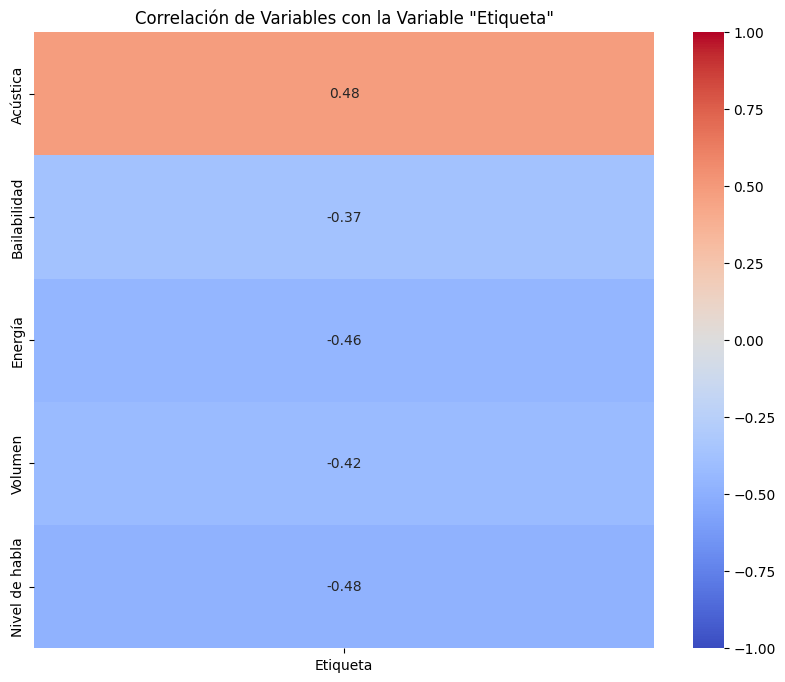

In [8]:
# Calcular la correlación entre las columnas y la variable 'Etiqueta'
correlation = playlist_df.corr()

# Seleccionar las correlaciones con respecto a 'Etiqueta'
correlation_label = correlation[['Etiqueta']].drop('Etiqueta')

# Crear una matriz de correlación
heatmap_data = correlation_label[np.abs(correlation_label['Etiqueta']) > 0.3]

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Crear el heatmap
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)

# Ajustar el título
plt.title('Correlación de Variables con la Variable "Etiqueta"')

# Mostrar el gráfico
plt.show()

# Identificar las variables de entrada y de salida del problema.

- Variables de Entrada

  'Acústica', 'Bailabilidad', 'Duración', 'Energía', 'Instrumentalidad',  'Tonalidad', 'Público', 'Volumen', 'Modo', 'Nivel de habla', 'Tempo',     'Compás', 'Valencia'

- Variables de Salida

 'Etiqueta'

# Analizamos los graficos del dataset

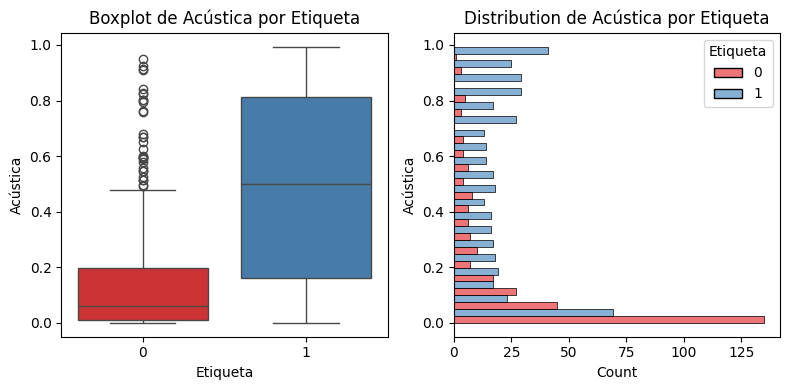

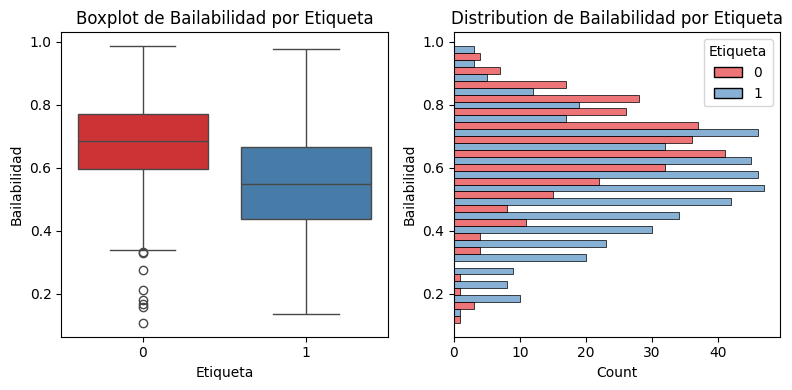

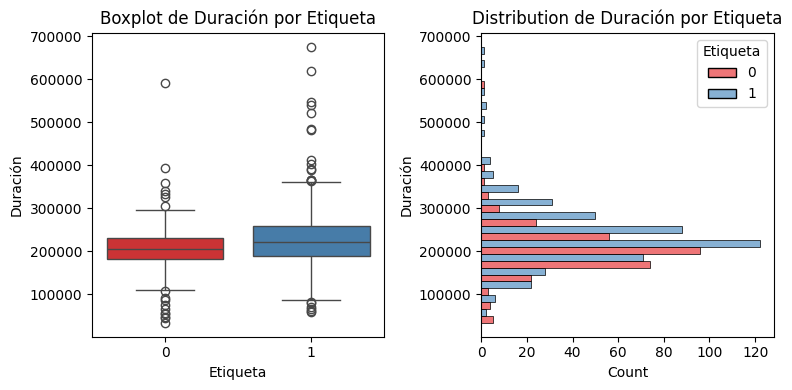

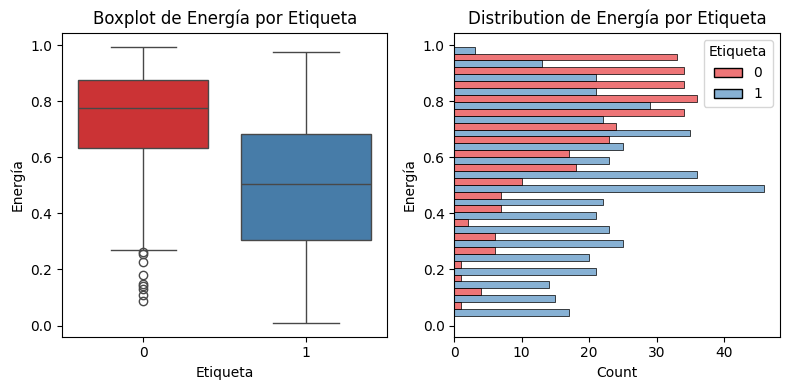

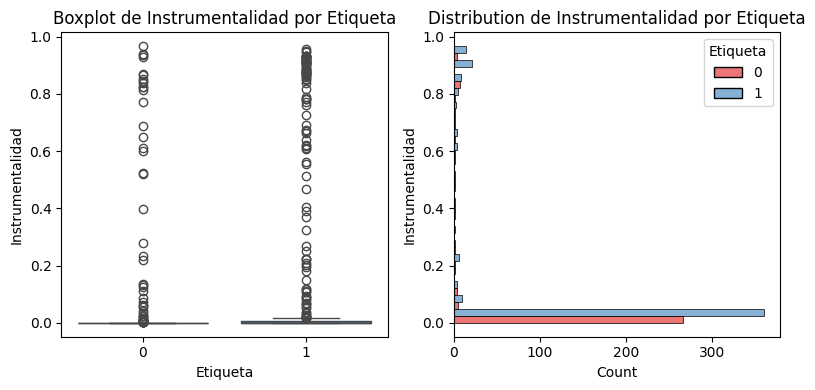

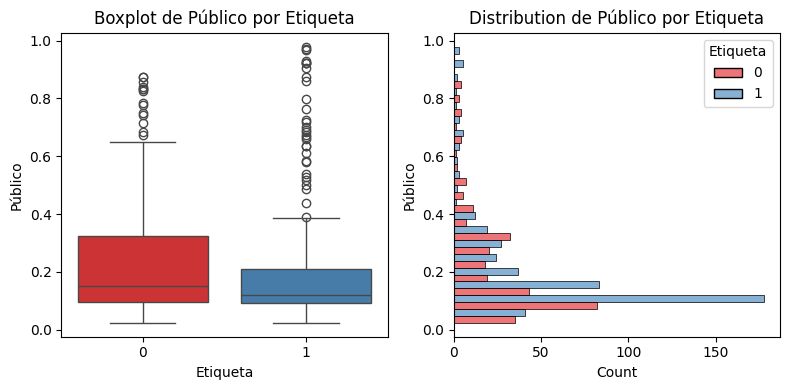

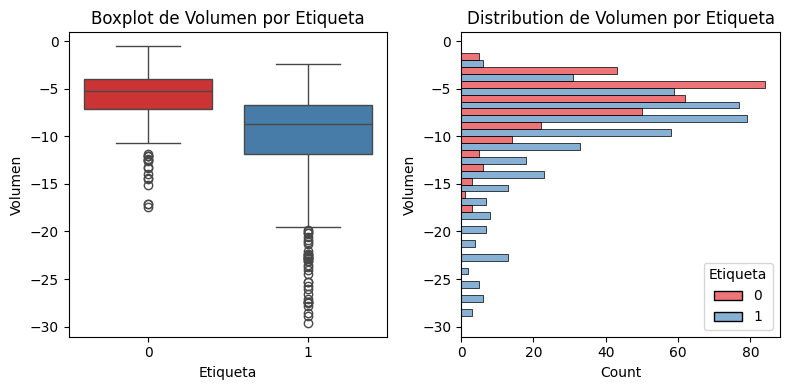

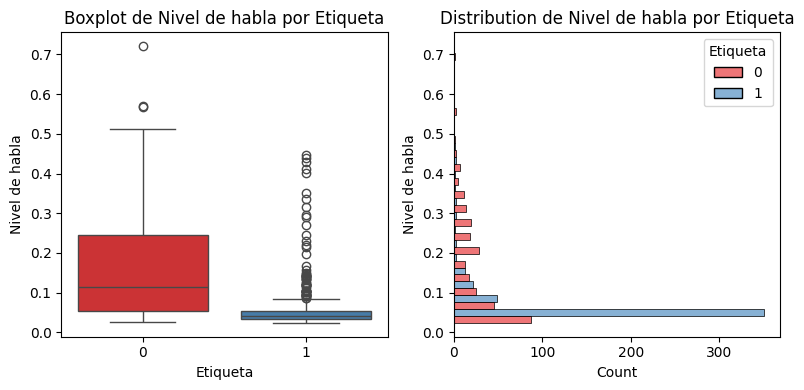

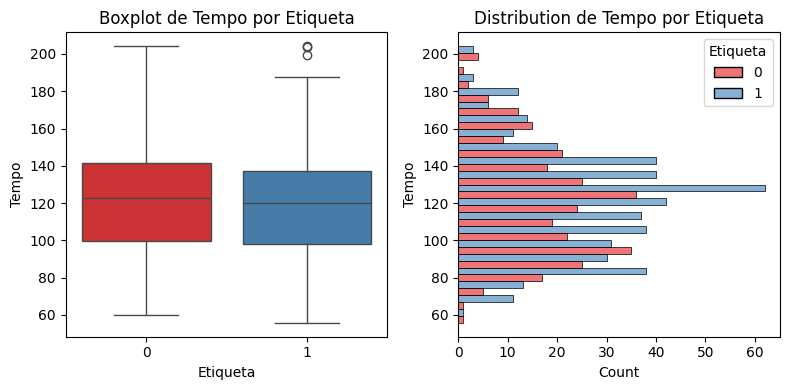

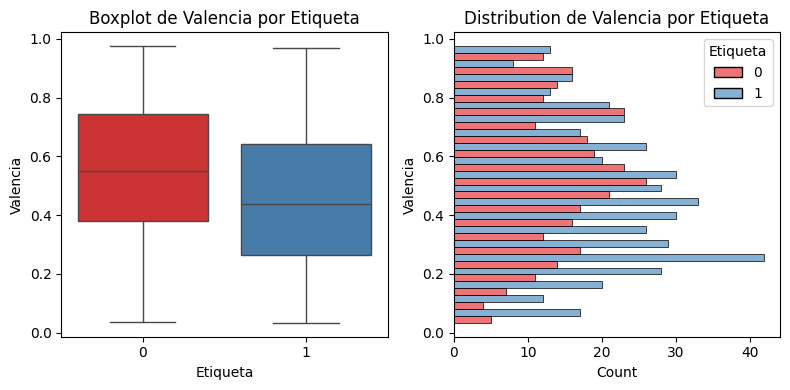

In [9]:


# Seleccionar columnas numéricas para los gráficos
numerical_columns = ['Acústica', 'Bailabilidad', 'Duración', 'Energía',
                     'Instrumentalidad', 'Público', 'Volumen',
                    'Nivel de habla', 'Tempo', 'Valencia']

# Iterar sobre las columnas numéricas para crear boxplots e histogramas individuales por Etiqueta
for col in numerical_columns:
    # Crear una figura con dos subplots en la misma fila
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    # Crear el boxplot en el primer subplot
    sns.boxplot(ax=axes[0], x='Etiqueta', y=col, data=playlist_df, hue='Etiqueta', palette="Set1")
    axes[0].set_title(f'Boxplot de {col} por Etiqueta')
    axes[0].set_xlabel('Etiqueta')
    axes[0].set_ylabel(col)
    axes[0].legend([],[], frameon=False)

    # Crear el histograma en el segundo subplot con orientación vertical
    sns.histplot(ax=axes[1], data=playlist_df, y=col, hue='Etiqueta', bins=20, kde=False, palette="Set1", alpha=0.6, stat='count', multiple="dodge")
    axes[1].set_title(f'Distribution de {col} por Etiqueta')
    axes[1].set_ylabel(col)
    axes[1].set_xlabel('Count')

    # Ajustar el espaciado entre los subplots
    plt.tight_layout()

    # Mostrar la figura
    plt.show()



In [10]:
# Información sobre el balance de la variable de salida 'Etiqueta'
label_balance = playlist_df['Etiqueta'].value_counts(normalize=True)

print(f"Balance de la variable de salida 'Etiqueta': ")
print(f"{100*label_balance[0]:.1f}% de 0s")
print(f"{100*label_balance[1]:.1f}% de 1s")

Balance de la variable de salida 'Etiqueta': 
39.7% de 0s
60.3% de 1s


# 3. Limpieza y preparación de datos / ingeniería de features

Previamente se observo que el dataset no presenta datos faltantes.

## Codificación de variables  



Las variables categoricas que tenemos son modo, compas, tonalidad y etiqueta, por lo que aplicamos codificacion de variables dummies en compas y tonalidad.



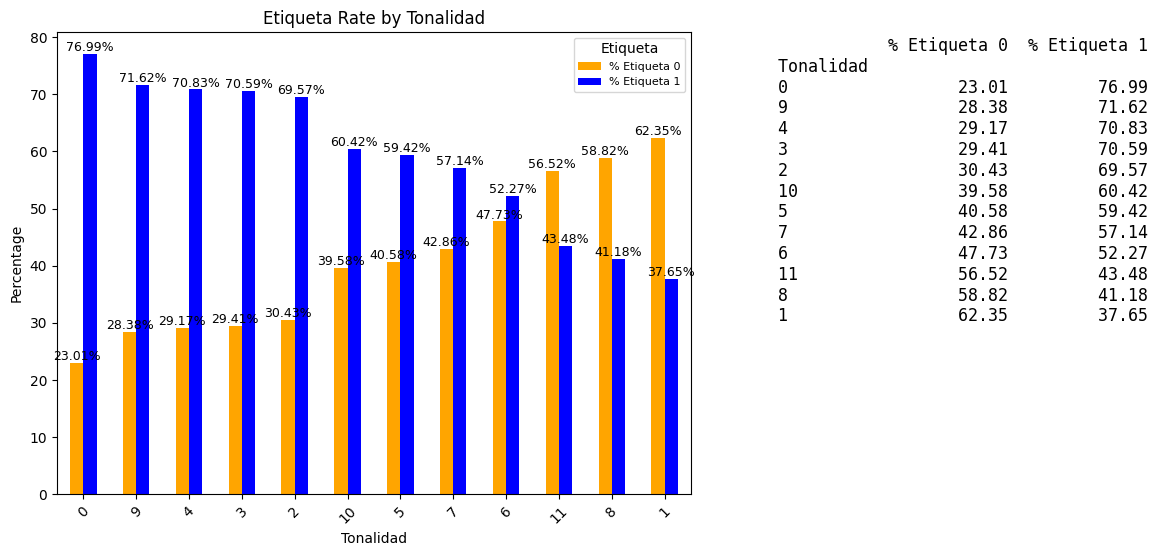

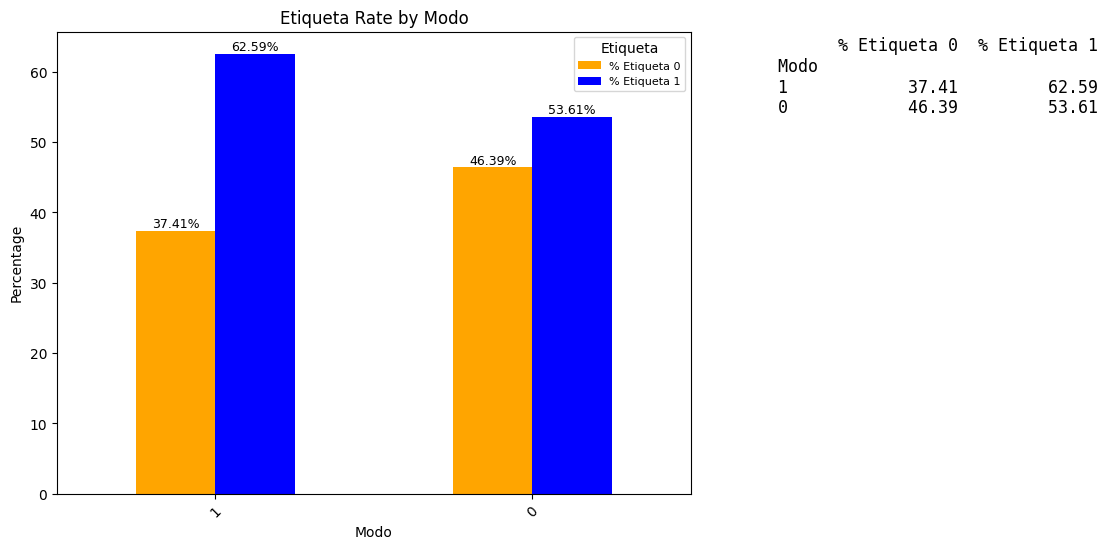

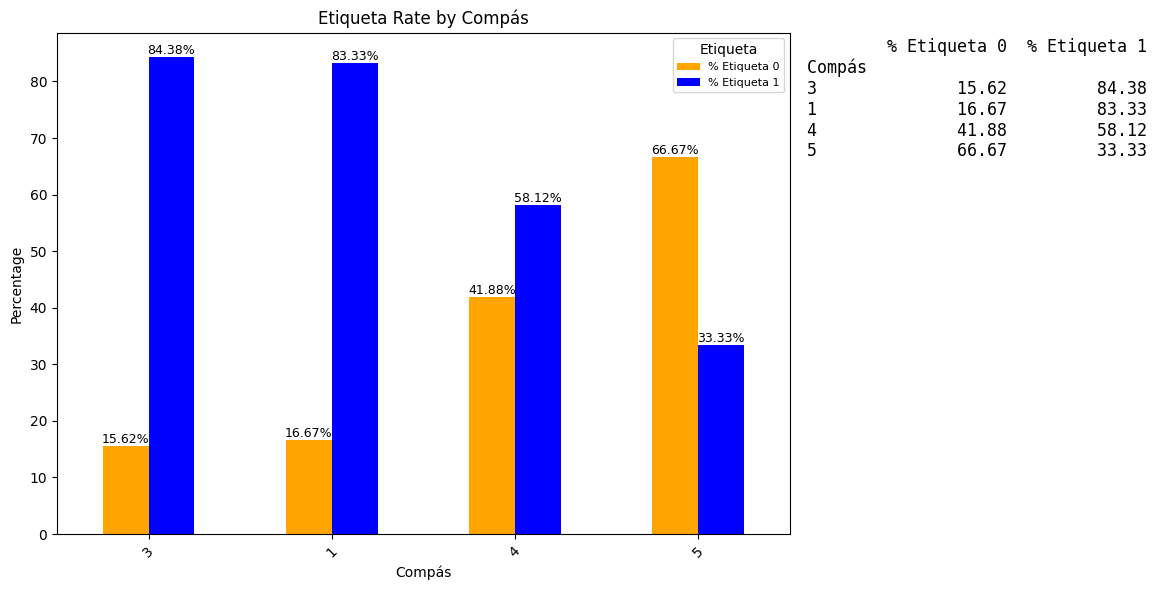

In [11]:

# Asegúrate de que las variables categóricas estén en el formato adecuado
playlist_df['Tonalidad'] = playlist_df['Tonalidad'].astype(str)
playlist_df['Etiqueta'] = playlist_df['Etiqueta'].astype(int)

categorical_columns = ['Tonalidad', 'Modo', 'Compás']

# Iterar sobre las variables categóricas para crear gráficos de barras y mostrar DataFrame
for col in categorical_columns:
    # Calcular los porcentajes y ordenar por la columna '% Etiqueta 1'
    percentages = playlist_df.groupby([col])['Etiqueta'].value_counts(normalize=True).unstack().fillna(0)

    # Multiplicar por 100 para obtener porcentajes y redondear
    percentages = (percentages * 100).round(2)

    # Renombrar las columnas para mayor claridad
    percentages.columns = ['% Etiqueta 0', '% Etiqueta 1']

    # Ordenar los valores para la visualización
    percentages = percentages.sort_values(by='% Etiqueta 1', ascending=False)

    # Crear una figura con dos subplots en la misma fila
    fig, axes = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [3, 1]})

    # Crear el gráfico de barras en el primer subplot
    ax = percentages.plot(kind='bar', color=['orange', 'blue'], ax=axes[0])

    # Añadir título y etiquetas
    ax.set_title(f'Etiqueta Rate by {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Percentage')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

    # Mostrar porcentajes sobre las barras con un tamaño de fuente más pequeño
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}%',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center',
                    va='bottom',
                    fontsize=9)

    # Ajustar el tamaño de la leyenda
    ax.legend(title='Etiqueta', prop={'size': 8})

    # Mostrar el DataFrame en el subplot derecho
    axes[1].axis('off')  # Apagar el eje del gráfico para que no se vea el marco
    table_text = percentages.to_string(index=True)
    axes[1].text(0.01, 0.99, table_text, transform=axes[1].transAxes, fontsize=12, verticalalignment='top', fontfamily='monospace')

# Ajustar la visualización
plt.tight_layout()
plt.show()

In [12]:
# Hacemos One-Hot encoder para  variables categoricas:  Compás

one_hot_compas = pd.get_dummies(playlist_df['Compás'], prefix='Compás', drop_first=True).astype(int)
one_hot_tonalidad = pd.get_dummies(playlist_df['Tonalidad'], prefix='Tonalidad', drop_first=True).astype(int)

# Concatenamos las columnas creadas y eliminamos las originales
data_one_hot = pd.concat([playlist_df, one_hot_compas, one_hot_tonalidad], axis=1)
data_one_hot = data_one_hot.drop(['Compás', 'Tonalidad'], axis=1)

data_one_hot.columns


Index(['Acústica', 'Bailabilidad', 'Duración', 'Energía', 'Instrumentalidad',
       'Público', 'Volumen', 'Modo', 'Nivel de habla', 'Tempo', 'Valencia',
       'Etiqueta', 'Compás_3', 'Compás_4', 'Compás_5', 'Tonalidad_1',
       'Tonalidad_10', 'Tonalidad_11', 'Tonalidad_2', 'Tonalidad_3',
       'Tonalidad_4', 'Tonalidad_5', 'Tonalidad_6', 'Tonalidad_7',
       'Tonalidad_8', 'Tonalidad_9'],
      dtype='object')

In [13]:
playlist_df.shape


(750, 14)

In [14]:
(playlist_df['Compás'] == 1).sum()

6

In [15]:
(data_one_hot['Compás_3'] + data_one_hot['Compás_4'] + data_one_hot['Compás_5']).sum()


744

### Correlación de features numéricas y ordinales


Podemos combinar múltiples features para identificar correlaciones usando un solo gráfico. Esto se puede hacer con features numéricos y categóricos que tienen valores numéricos.



In [16]:
# Contar el número total de filas duplicadas
numero_duplicados = data_one_hot.duplicated().sum()

# Imprimir el resultado
print(f"El número total de filas duplicadas es: {numero_duplicados}")

# Eliminar filas duplicadas
data_one_hot = data_one_hot.drop_duplicates()

# Verificar que las filas duplicadas se han eliminado
numero_duplicados = data_one_hot.duplicated().sum()
print(f"Número de duplicados después de la eliminación: {numero_duplicados}")


El número total de filas duplicadas es: 14
Número de duplicados después de la eliminación: 0


### Convertimos el dato de la duracion a segundos

In [17]:
# Asumiendo que 'Duración' está en milisegundos
data_one_hot['Duración'] = data_one_hot['Duración'] / 1000

# Verificar que la conversión se realizó correctamente
print(data_one_hot['Duración'].head())


0    100.125
1    207.019
2    216.200
3    136.413
4    181.440
Name: Duración, dtype: float64


### Conversión
Decidimos utilizar StandardScaler para las variables no categoricas y un FunctionTransformer Logaritmico para la variable instrumentalidad.

In [18]:
data_scaled = data_one_hot.copy()

scaled_standard_columns = ["Acústica", "Bailabilidad", "Duración", "Energía", "Público", "Volumen", "Nivel de habla", "Tempo", "Valencia"]
scaled_log_columns = ["Instrumentalidad"]

standard_scaler = StandardScaler()
log_transformer = FunctionTransformer(np.log1p, validate=True)

data_scaled[scaled_standard_columns] = standard_scaler.fit_transform(data_scaled[scaled_standard_columns])
data_scaled[scaled_log_columns] = log_transformer.fit_transform(data_scaled[scaled_log_columns])

data_scaled

,Acústica,Bailabilidad,Duración,Energía,Instrumentalidad,Público,Volumen,Modo,Nivel de habla,Tempo,...,Tonalidad_10,Tonalidad_11,Tonalidad_2,Tonalidad_3,Tonalidad_4,Tonalidad_5,Tonalidad_6,Tonalidad_7,Tonalidad_8,Tonalidad_9
0,1.052253,-0.477162,-1.815891,-0.293021,0.596636,-0.515916,-1.263088,0,-0.519895,-0.030341,...,0,0,0,0,0,0,0,0,1,0
1,-0.490978,0.683589,-0.198043,0.075145,0.000000,0.332342,0.310843,1,-0.638927,0.114462,...,0,0,0,0,1,0,0,0,0,0
2,-0.073328,0.196074,-0.059088,-0.554301,0.000004,-0.431652,-0.158348,1,-0.664638,0.679582,...,0,0,0,0,0,1,0,0,0,0
3,0.720503,1.240750,-1.266670,-1.480654,0.190620,-0.111448,-0.500030,1,-0.534179,-0.381515,...,0,0,0,0,0,1,0,0,0,0
4,1.555803,-0.761546,-0.585183,-0.538465,0.000173,-0.756349,0.071367,0,-0.608455,-1.059610,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,-1.059175,-1.289687,1.721205,1.377583,0.000156,-0.442887,0.874072,0,-0.413242,-0.306316,...,0,0,0,0,0,0,1,0,0,0
746,-1.053858,-0.633863,-0.107520,1.076716,0.006002,-0.601303,1.036445,0,-0.425621,1.391807,...,1,0,0,0,0,0,0,0,0,0
747,1.653551,0.050980,-1.426284,-1.112488,0.000000,0.871632,0.172178,1,-0.631309,0.616457,...,0,0,0,0,0,0,0,0,0,0
748,-0.562068,0.602337,0.444804,0.902529,0.000028,-0.459740,0.319410,1,-0.587505,0.825766,...,0,0,0,1,0,0,0,0,0,0


In [19]:
data_scaled['Etiqueta']

,Etiqueta
0,1
1,1
2,1
3,1
4,1
...,...
745,0
746,0
747,1
748,1


## Visualizando con t-SNE

Ahora que ya convertimos nuestras variables e imputamos los datos faltanes, veamos si las reduciendo la dimensionalidad podemos notar algún patrón en nuestros datos.

La idea será ver si aquellos pasajeros que sobrevivieron tienden a estar en clusters o zonas distintas que los que no.

Recordemos que t-SNE es sensible a las escalas de las variables, por lo que primero es recomendable escalarlas.

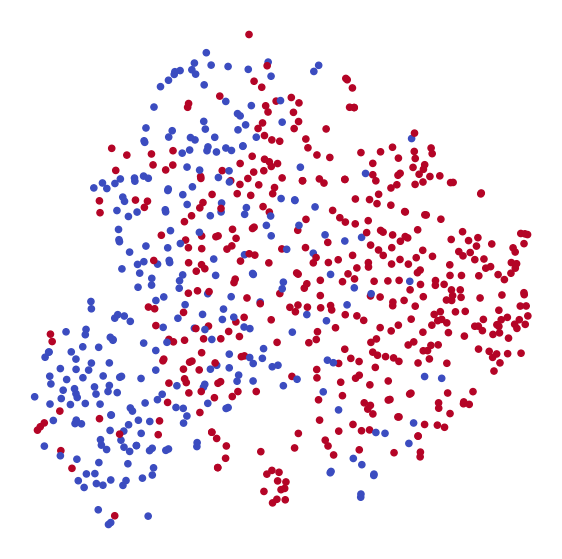

In [20]:
tsne = TSNE(n_components=2, perplexity=40, random_state=20)
projection_2D = tsne.fit_transform(data_scaled.drop('Etiqueta', axis=1))

plt.figure(figsize=(7, 7))
plt.scatter(projection_2D[:,0], projection_2D[:,1],
            c=data_scaled['Etiqueta'],
            cmap='coolwarm',
            s=20)
plt.axis('off')
plt.show();

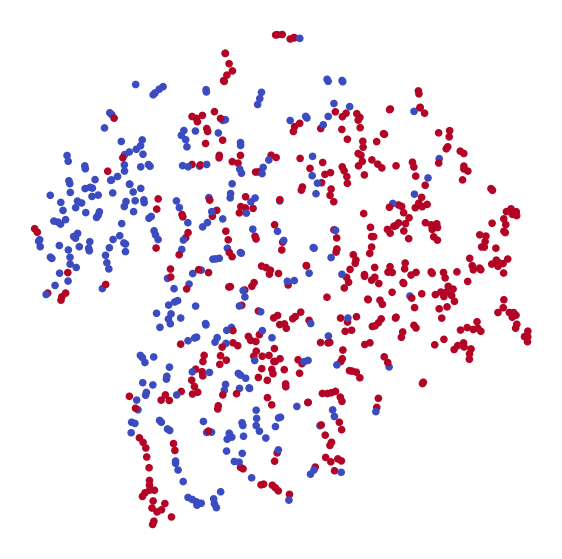

In [21]:
tsne = TSNE(n_components=2, perplexity=10, random_state=10)
projection_2D = tsne.fit_transform(data_scaled.drop('Etiqueta', axis=1))

plt.figure(figsize=(7, 7))
plt.scatter(projection_2D[:,0], projection_2D[:,1],
            c=data_scaled['Etiqueta'],
            cmap='coolwarm',
            s=20)
plt.axis('off')
plt.show();

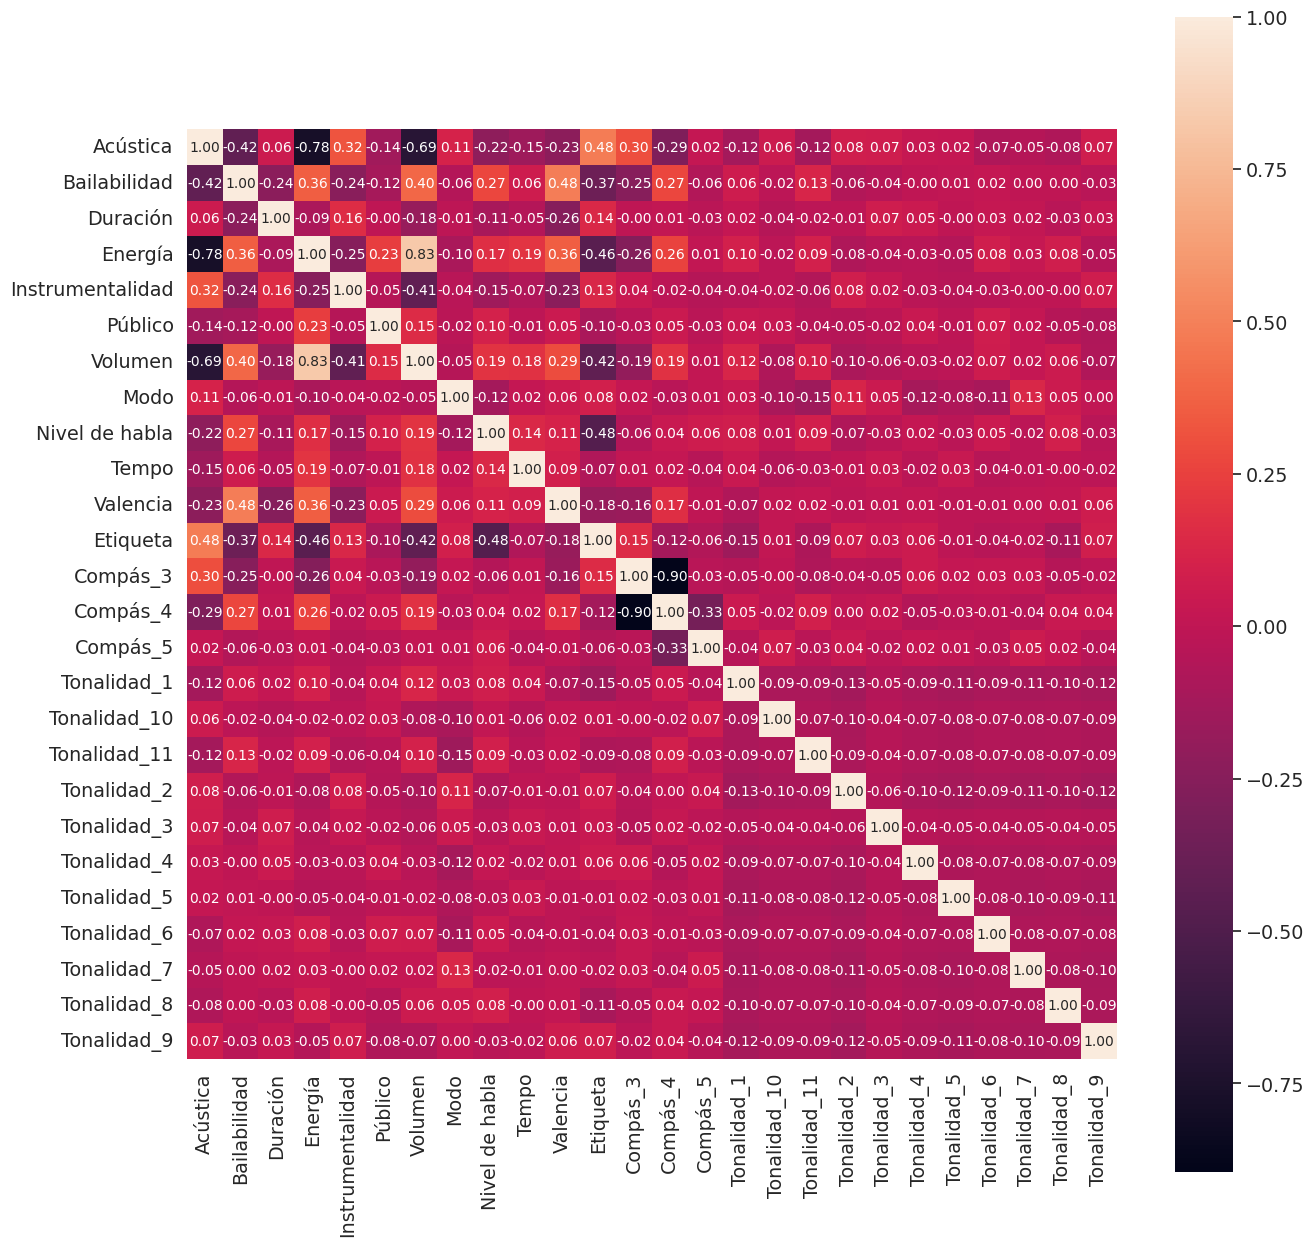

In [22]:
# Computamos la matriz de correlacion
corr = data_scaled.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
sns.set(font_scale=1.25)
fig, ax = plt.subplots(figsize=(15,15))
hm = sns.heatmap(corr, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})

plt.show()

In [23]:
!pip install pydotplus

In [24]:
def dibujar_arbol(modelo,target_names,feature_names):
    dot_data = StringIO()
    sklearn.tree.export_graphviz(modelo, out_file=dot_data,
                    filled=True,
                    class_names = target_names,
                    feature_names=feature_names,
                    special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    display(Image(graph.create_png()))

In [25]:
data_scaled.columns


Index(['Acústica', 'Bailabilidad', 'Duración', 'Energía', 'Instrumentalidad',
       'Público', 'Volumen', 'Modo', 'Nivel de habla', 'Tempo', 'Valencia',
       'Etiqueta', 'Compás_3', 'Compás_4', 'Compás_5', 'Tonalidad_1',
       'Tonalidad_10', 'Tonalidad_11', 'Tonalidad_2', 'Tonalidad_3',
       'Tonalidad_4', 'Tonalidad_5', 'Tonalidad_6', 'Tonalidad_7',
       'Tonalidad_8', 'Tonalidad_9'],
      dtype='object')

# Desarrollamos un DecisionTreeClassifier para predecir la variable etiqueta

In [26]:
data_scaled['Etiqueta'] = pd.to_numeric(data_scaled['Etiqueta'], errors='coerce')


In [27]:
data_scaled['Etiqueta'] = pd.cut(data_scaled['Etiqueta'], bins=2, labels=['0', '1'])


In [28]:
print(data_scaled['Etiqueta'].dtype)


category


In [29]:
print(data_scaled.columns.tolist())


['Acústica', 'Bailabilidad', 'Duración', 'Energía', 'Instrumentalidad', 'Público', 'Volumen', 'Modo', 'Nivel de habla', 'Tempo', 'Valencia', 'Etiqueta', 'Compás_3', 'Compás_4', 'Compás_5', 'Tonalidad_1', 'Tonalidad_10', 'Tonalidad_11', 'Tonalidad_2', 'Tonalidad_3', 'Tonalidad_4', 'Tonalidad_5', 'Tonalidad_6', 'Tonalidad_7', 'Tonalidad_8', 'Tonalidad_9']


In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

features = ['Acústica', 'Bailabilidad', 'Duración', 'Energía', 'Instrumentalidad',
       'Público', 'Volumen', 'Modo', 'Nivel de habla', 'Tempo', 'Valencia', 'Compás_3',
        'Compás_4', 'Compás_5', 'Tonalidad_1', 'Tonalidad_10', 'Tonalidad_11', 'Tonalidad_2',
        'Tonalidad_3', 'Tonalidad_4', 'Tonalidad_5', 'Tonalidad_6', 'Tonalidad_7',
       'Tonalidad_8', 'Tonalidad_9']

X = data_scaled.drop('Etiqueta', axis=1)  # Características
y = data_scaled['Etiqueta']  # Variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el clasificador
dt = DecisionTreeClassifier(criterion="gini", max_depth=3)
dt.fit(X_train[features], y_train)

# Predicción y cálculo de precisión
predictions = dt.predict(X_test[features])
accuracy = accuracy_score(y_test, predictions)

print(f"Accuracy: {accuracy}")





Accuracy: 0.831081081081081


# Accuracy: 83,1%


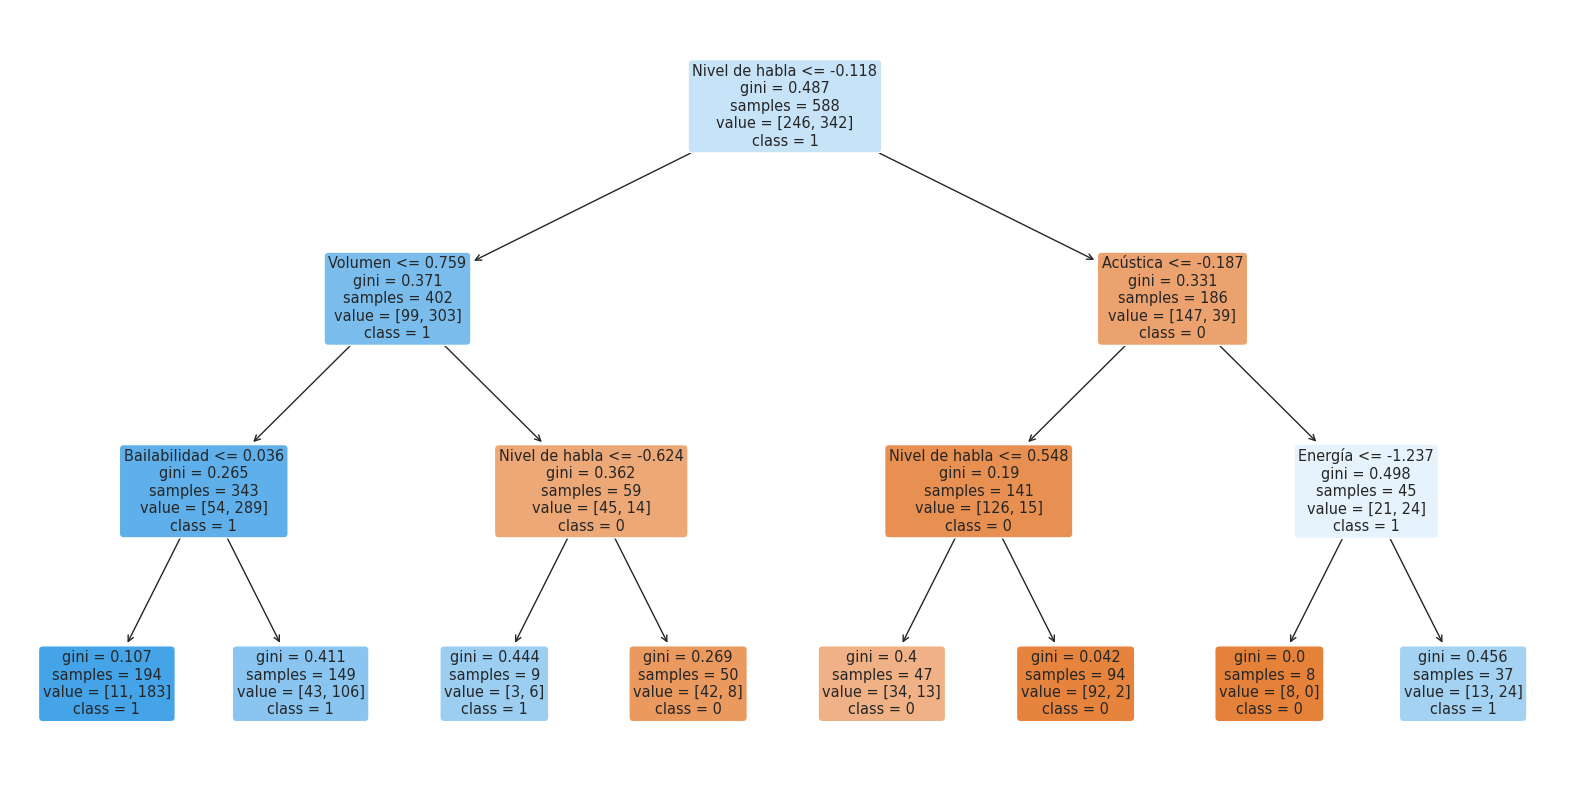

In [31]:
# Dibujar el árbol de decisión
plt.figure(figsize=(20,10))  # Ajusta el tamaño según sea necesario
tree.plot_tree(dt,
               feature_names=features,
               class_names=['0', '1'],  # Ajusta según las etiquetas de clase
               filled=True,
               rounded=True)
plt.show()
